In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [83]:
# load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [84]:
train.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Licensed',
       'official_video', 'id', 'Track', 'Album', 'Uri', 'Url_spotify',
       'Url_youtube', 'Comments', 'Description', 'Title', 'Channel',
       'Composer', 'Artist'],
      dtype='object')

In [85]:
train.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,0.724151,0.000062,0.000807,0.340,83.398,...,Sinkovsky Plays and Sings Vivaldi,spotify:track:7njAZhca4o80qQdCgyEWya,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=NzCL9uLkQSI,3070.0,Antonio Vivaldi's 4th Concerto - From his Most...,"Antonio Vivaldi - Concerto No.4 in F minor, Op...",Mozafunkula,NaN,Marshmello
1,0.0,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,0.746,148.692,...,NaN,spotify:track:2nnXe7n3Vivs7OfQKRsfWD,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...","A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",Anton Paisov,Finneas O'Connell,Bon Iver
2,0.0,NaN,6.0,-15.596,NaN,0.667628,0.867000,0.001772,0.380,84.899,...,Vivaldi: The Four Seasons,spotify:track:0VQMAup2VdeQWLCvM14Uz2,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",NaN,Anton Paisov,Finneas O'Connell,Kamasi Washington
3,1.0,0.209585,NaN,-6.251,0.0277,0.003796,NaN,0.001000,NaN,150.220,...,Life Thru A Lens,spotify:track:1M2nd8jNUkkwrc1dgBPTJz,https://open.spotify.com/artist/2HcwFjNelS49kF...,https://www.youtube.com/watch?v=luwAMFcc2f8,24350.0,25 years of Life Thru A Lens. Pre-order the br...,Robbie Williams - Angels,robbiewilliamsvevo,Louis Bell,Drake
4,4.0,NaN,5.0,NaN,0.0260,0.000003,0.000467,0.002924,0.295,97.997,...,Escapology,spotify:track:2Ms33RTRCT6gArrpcrPxmo,https://open.spotify.com/artist/2HcwFjNelS49kF...,https://www.youtube.com/watch?v=iy4mXZN1Zzk,31150.0,25 years of Life Thru A Lens. Pre-order the br...,Robbie Williams - Feel,robbiewilliamsvevo,Juicy J,Alicia Keys


In [86]:
test.columns

Index(['Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
       'Views', 'Likes', 'Stream', 'Album_type', 'Licensed', 'official_video',
       'id', 'Track', 'Album', 'Uri', 'Url_spotify', 'Url_youtube', 'Comments',
       'Description', 'Title', 'Channel', 'Composer', 'Artist'],
      dtype='object')

In [87]:

x_train = train.drop(columns=['Danceability'])
x_train = x_train.drop(columns=['Uri', 'Url_spotify', 'Url_youtube'])
y_train = train['Danceability']
#transform y_train to int
y_train = y_train.astype(int)
x_test = test #doesn't have the target column


In [88]:
#data exploration

print(train.shape)

(17170, 29)


In [89]:
# check missing values
train.isnull().sum()

Danceability           0
Energy              2555
Key                 2602
Loudness            2569
Speechiness         2515
Acousticness        2577
Instrumentalness    2601
Liveness            2535
Valence             2574
Tempo               2562
Duration_ms         2603
Views               2596
Likes               2579
Stream              2568
Album_type          2560
Licensed            2593
official_video      2615
id                     0
Track               2562
Album               2585
Uri                 2564
Url_spotify         2591
Url_youtube         2529
Comments            2581
Description         2604
Title               2623
Channel             2558
Composer            2558
Artist              2566
dtype: int64

In [90]:
# unique values frequency for Danceability
train['Danceability'].value_counts()

8.0    1860
6.0    1856
7.0    1826
5.0    1702
3.0    1675
2.0    1664
0.0    1655
9.0    1654
1.0    1639
4.0    1639
Name: Danceability, dtype: int64

/tmp/ipykernel_7033/1438257280.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Danceability'])


Skewness: -0.059059


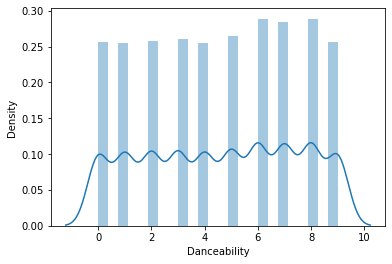

In [91]:
#plot danceability
sns.distplot(train['Danceability'])
#skewness
print("Skewness: %f" % train['Danceability'].skew())

In [92]:
# grab numeric columns
numeric_cols = x_train.select_dtypes(include=[np.number])
numeric_cols.columns

Index(['Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
       'Views', 'Likes', 'Stream', 'id', 'Comments'],
      dtype='object')

In [93]:
x_train.describe()

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,id,Comments
count,1.461500e+04,14568.000000,14601.000000,14655.000000,1.459300e+04,14569.000000,14635.000000,14596.000000,14608.000000,1.456700e+04,1.457400e+04,1.459100e+04,1.460200e+04,17170.000000,1.458900e+04
mean,3.358392e-01,5.231604,-7.561370,0.095462,1.148404e-01,0.054934,0.033745,0.525842,120.937819,2.228307e+05,8.791096e+07,6.485064e+05,1.290426e+08,8584.500000,2.810321e+04
std,2.426825e-01,3.456986,4.540944,0.103068,2.215160e-01,0.191392,0.114862,0.244912,29.665225,1.211659e+05,2.523918e+08,1.726157e+06,2.417681e+08,4956.696396,2.142922e+05
min,8.365427e-15,0.000000,-46.251000,0.000000,1.367631e-18,0.000000,0.000003,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,6.574000e+03,0.000000,0.000000e+00
25%,1.342177e-01,2.000000,-8.655000,0.036100,9.797218e-05,0.000000,0.000836,0.336000,97.041000,1.793055e+05,1.971684e+06,2.251600e+04,1.628195e+07,4292.250000,5.340000e+02
50%,2.954083e-01,5.000000,-6.472000,0.051400,6.967871e-03,0.000002,0.001907,0.531000,119.995500,2.120300e+05,1.427208e+07,1.239210e+05,4.550224e+07,8584.500000,3.171000e+03
75%,5.062616e-01,8.000000,-4.920000,0.106000,1.025032e-01,0.000392,0.012487,0.722000,139.990250,2.495115e+05,6.603988e+07,5.077155e+05,1.256493e+08,12876.750000,1.361900e+04
max,1.000000e+00,10.000000,0.829000,0.964000,9.880479e-01,1.000000,1.000000,0.993000,243.372000,4.581483e+06,5.773798e+09,4.014762e+07,3.386520e+09,17169.000000,1.608314e+07


In [94]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scale numeric columns
# numeric_cols_norm = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()
# numeric_cols_norm.describe()
scaler = StandardScaler()

numeric_cols_norm = scaler.fit_transform(numeric_cols)
numeric_cols_norm = pd.DataFrame(numeric_cols_norm, columns=numeric_cols.columns)

# do the same for test data
numeric_cols_test_norm = scaler.transform(numeric_cols)
numeric_cols_test_norm = pd.DataFrame(numeric_cols_test_norm, columns=numeric_cols.columns)


/tmp/ipykernel_7033/1937847405.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

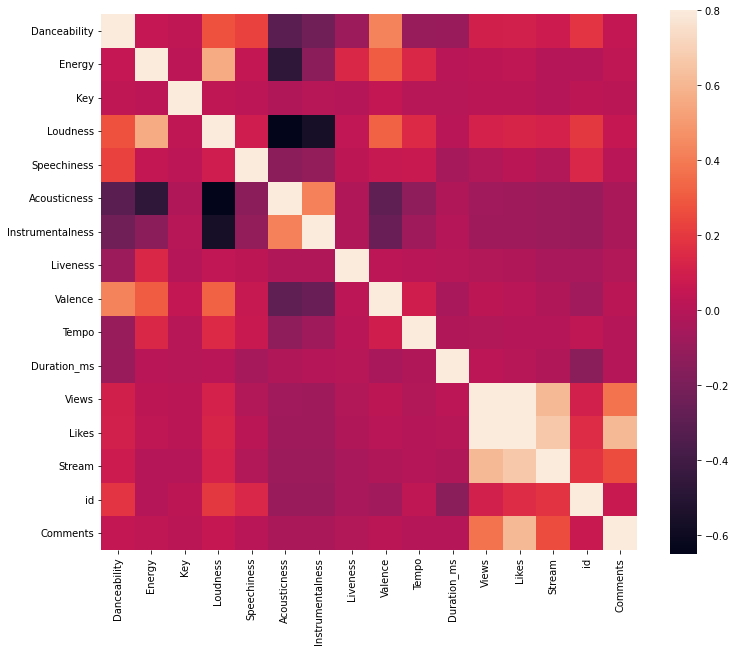

In [103]:
# check correlation
corr = train.corr()

# plot correlation
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=0.8, square=True)



In [96]:
#replace normalized numeric columns
x_train[numeric_cols_norm.columns] = numeric_cols_norm
x_test[numeric_cols_norm.columns] = numeric_cols_test_norm



In [97]:
# transform danceability to categorical
from pandas.api.types import CategoricalDtype
y_train = y_train.astype(CategoricalDtype(ordered=True))


In [98]:
# count how many unique values in each danceability category
y_train.value_counts()



8    1860
6    1856
7    1826
5    1702
3    1675
2    1664
0    1655
9    1654
1    1639
4    1639
Name: Danceability, dtype: int64

In [61]:
from sklearn.impute import SimpleImputer
num_x_train = x_train[numeric_cols_norm.columns].copy()
num_x_test = x_test[numeric_cols_norm.columns].copy()

# check if there is any missing values
impute = SimpleImputer(strategy='median')
impute.fit(num_x_train)
num_x_train = impute.transform(num_x_train)
num_x_test = impute.transform(num_x_test)

# Decision Tree Classifier

In [17]:
# predict using multi-class aproach
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


# create model
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 8],
#     'max_features': ['auto', 'sqrt', 'log2', None]
# }

# model = DecisionTreeClassifier(random_state=1)


# #train model
# model.fit(num_x_train, y_train)

# # define cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, verbose=1)
# grid_search.fit(num_x_train, y_train)

# # evaluate model
# scores = cross_val_score(model, num_x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


In [18]:
#best_params = grid_search.best_params_
best_params = {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20}
print(f"Best hyperparameters: {best_params}")
#Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20}

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20}


In [19]:
best_model = DecisionTreeClassifier(**best_params, random_state=1)
best_model.fit(num_x_train, y_train)
best_scores = cross_val_score(best_model, num_x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
best_mae = -best_scores.mean()
print(f"Best MAE: {best_mae}")



Best MAE: 2.097029702970297


## 

In [20]:
# get preds for test set
preds = best_model.predict(num_x_test)

In [21]:
#transform preds to int and save to csv
preds = preds.astype(int)

In [22]:
# make preds into the model output format in the sample_submission.csv
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('submission.csv', index=False)



# XGBOOST

In [23]:
# try the same prediction as above but using XGBClassifier
import xgboost as xgb
from xgboost import XGBClassifier


In [24]:
from sklearn.model_selection import train_test_split
x_train_v2, x_val, y_train_v2, y_val = train_test_split(num_x_train, y_train, test_size=0.25, shuffle=True, stratify=y_train, random_state=1)

In [38]:
from sklearn.model_selection import RandomizedSearchCV
# create model
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 4, 8],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bylevel': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bynode': [0.5, 0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4]
}

# model = XGBClassifier(random_state=1, n_jobs=1)

# # train model
# grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring='neg_mean_absolute_error', cv=cv, verbose=1)

# #grid_search.fit(num_x_train, y_train)
# grid_search.fit(x_train_v2, y_train_v2)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=Non...
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_child_weight': [1, 2, 4, 8],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4],
                                        'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]},
                   scoring='neg_mean_absolute_error', verbose=1)

In [40]:
# best_params = grid_search.best_params_
# took 27 minutes to run
best_params = {'subsample': 0.7, 'reg_lambda': 0.3, 'reg_alpha': 0.4, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 20, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6, 'colsample_bynode': 0.9, 'colsample_bylevel': 0.9}

print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'subsample': 0.7, 'reg_lambda': 0.3, 'reg_alpha': 0.4, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 20, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6, 'colsample_bynode': 0.9, 'colsample_bylevel': 0.9}


In [42]:
#prediction with CV

# baseline_params = {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'min_child_weight': 1, 'gamma': 0, 'subsample': 0.5, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'colsample_bynode': 0.5, 'reg_alpha': 0, 'reg_lambda': 0}
# best_model = XGBClassifier(**baseline_params, random_state=1)
best_model = XGBClassifier(**best_params, random_state=1)
best_model.fit(num_x_train, y_train)

best_scores = cross_val_score(best_model, num_x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

best_mae = -best_scores.mean()
print(f"Best MAE: {best_mae}")

KeyboardInterrupt: 

In [43]:
# Non CV evaluation

from sklearn.metrics import mean_absolute_error

best_model = XGBClassifier(**best_params, random_state=1)
best_model.fit(x_train_v2, y_train_v2)
#get MAE without CV
preds = best_model.predict(x_val)
mae = mean_absolute_error(y_val, preds)
print(f"MAE without CV: {mae}")


MAE without CV: 1.8110878173771257


In [45]:
# get preds for test set
preds = best_model.predict(num_x_test)
#transform preds to int and save to csv
preds = preds.astype(int)
# make preds into the model output format in the sample_submission.csv
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('submission.csv', index=False)


# XG BOOST REG **


In [99]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
# get parameters for XGBRegressor
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 4, 8],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bylevel': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bynode': [0.5, 0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4]
}

#model = XGBRegressor(random_state=1, n_jobs=1)

# train model
#grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring='neg_mean_absolute_error', cv=cv, verbose=1)


In [100]:
# grid_search.fit(num_x_train, y_train)
# best_params = grid_search.best_params_
# print(f"Best hyperparameters: {best_params}")
#{'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0.4, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 30, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.8}
best_params = {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0.4, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 30, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.8}
# # evaluate model
# scores = cross_val_score(model, num_x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [101]:
from xgboost import XGBRegressor
best_model = XGBRegressor(**best_params, random_state=1)
best_model.fit(num_x_train, y_train)

#best_scores = cross_val_score(best_model, num_x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

best_model.fit(x_train_v2, y_train_v2)
#get MAE without CV
preds = best_model.predict(x_val)
preds = np.rint(preds)
mae = mean_absolute_error(y_val, preds)
print(f"MAE without CV: {mae}")
#MAE without CV: 1.7099317343292821

MAE without CV: 1.7027719543442814


In [78]:
# get preds for test set
preds = best_model.predict(num_x_test)
#transform preds to int and save to csv
preds = np.rint(preds)
preds = preds.astype(int)
# make preds into the model output format in the sample_submission.csv
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('submission.csv', index=False)

# Adaboost 

In [36]:
# import
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# create model
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'algorithm': ['SAMME', 'SAMME.R']
}
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'algorithm': ['SAMME', 'SAMME.R']
}
model = AdaBoostClassifier(random_state=1)

# train model

#grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='neg_mean_absolute_error', cv=cv, verbose=1)

#grid_search.fit(num_x_train, y_train)

#best_params = grid_search.best_params_

#print(f"Best hyperparameters: {best_params}")

#prediction with CV

baseline_params = {'n_estimators': 200, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'}

best_model = AdaBoostClassifier(**baseline_params, random_state=1)

best_model.fit(num_x_train, y_train)

best_scores = cross_val_score(best_model, num_x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

best_mae = -best_scores.mean()

In [37]:
print(f"Best MAE: {best_mae}")

Best MAE: 1.9548631333721604


# AdaBoost Regressor

In [65]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# create model

model = AdaBoostRegressor(random_state=1)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    
}

# train model

# grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='neg_mean_absolute_error', cv=cv, verbose=1)

# grid_search.fit(num_x_train, y_train)

# best_params = grid_search.best_params_

# print(f"Best hyperparameters: {best_params}")

#prediction with CV

baseline_params = {'n_estimators': 200, 'learning_rate': 0.2}

best_model = AdaBoostRegressor(**baseline_params, random_state=1)

best_model.fit(num_x_train, y_train)

#best_scores = cross_val_score(best_model, num_x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
y_pred = best_model.predict(x_val)
y_pred = y_pred.astype(int)

mae_val = mean_absolute_error(y_val, y_pred)

best_mae = -best_scores.mean()


In [66]:
print(f"Best MAE: {best_mae}")

Best MAE: 2.0784728281747022


In [52]:
y_preds = best_model.predict(num_x_test)

# KNN 

In [79]:
# Use KNN to classify the data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# create model
param_grid = {

    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}

model = KNeighborsClassifier()

# train model

grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring='neg_mean_absolute_error', cv=cv, verbose=1)

grid_search.fit(num_x_train, y_train)

best_params = grid_search.best_params_

print(f"Best hyperparameters: {best_params}")

#prediction with CV

model = KNeighborsClassifier(**best_params)

model.fit(num_x_train, y_train)

y_pred = model.predict(x_val)

mae_val = mean_absolute_error(y_val, y_pred)

print(f"MAE: {mae_val}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'leaf_size': 20, 'algorithm': 'auto'}
MAE: 2.6382483112042863


# Ordinal model

In [80]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
mod_prob = OrderedModel(y_train, x_train[numeric_cols], distr='logit')

ValueError: Boolean array expected for the condition, not object

In [ ]:
res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()